In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
441657,2020-08-17,Dickinson,Kansas,20041.0,53,1
300031,2020-07-04,San Miguel,Colorado,8113.0,39,0
312215,2020-07-07,York,Virginia,51199.0,131,3
340038,2020-07-16,McIntosh,Oklahoma,40091.0,92,1
155437,2020-05-18,Grand Traverse,Michigan,26055.0,23,5
255930,2020-06-20,Napa,California,6055.0,225,4
181932,2020-05-27,Calhoun,Georgia,13037.0,130,5
283576,2020-06-28,Walker,Texas,48471.0,1967,28
24764,2020-04-01,Carroll,Maryland,24013.0,96,5
329871,2020-07-13,Polk,Missouri,29167.0,22,0


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
190419,2020-05-29,Charlottesville city,Virginia,51540.0,105,3,3.0,4.43
3705,2020-03-17,Charlottesville city,Virginia,51540.0,1,0,0.0,0.00
120998,2020-05-06,Charlottesville city,Virginia,51540.0,64,2,0.0,1.71
277346,2020-06-26,Albemarle,Virginia,51003.0,374,8,7.0,10.00
372828,2020-07-26,Charlottesville city,Virginia,51540.0,420,8,8.0,11.00
12222,2020-03-25,Albemarle,Virginia,51003.0,4,0,2.0,0.00
178183,2020-05-25,Albemarle,Virginia,51003.0,149,8,1.0,1.43
475938,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57
280516,2020-06-27,Charlottesville city,Virginia,51540.0,200,3,4.0,4.86
95038,2020-04-27,Charlottesville city,Virginia,51540.0,50,2,1.0,1.29


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
2319,".Anderson County, South Carolina",202558.0,Anderson,South Carolina
1649,".Treasure County, Montana",696.0,Treasure,Montana
3099,".Richland County, Wisconsin",17252.0,Richland,Wisconsin
2413,".Pennington County, South Dakota",113775.0,Pennington,South Dakota
443,".Floyd County, Georgia",98498.0,Floyd,Georgia
1949,".Mecklenburg County, North Carolina",1110356.0,Mecklenburg,North Carolina
2278,".Lackawanna County, Pennsylvania",209674.0,Lackawanna,Pennsylvania
2500,".Roane County, Tennessee",53382.0,Roane,Tennessee
2182,".Noble County, Oklahoma",11131.0,Noble,Oklahoma
2838,".Charles City County, Virginia",6963.0,Charles City,Virginia


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
153,2020-08-21,Albemarle,Virginia,51003.0,943,16,13.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
154,2020-08-22,Albemarle,Virginia,51003.0,955,16,12.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
155,2020-08-23,Albemarle,Virginia,51003.0,961,16,6.0,7.86,".Albemarle County, Virginia",109330.0,7.189244
156,2020-08-24,Albemarle,Virginia,51003.0,963,16,2.0,7.14,".Albemarle County, Virginia",109330.0,6.530687
157,2020-08-25,Albemarle,Virginia,51003.0,975,16,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
158,2020-08-26,Albemarle,Virginia,51003.0,980,17,5.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
159,2020-08-27,Albemarle,Virginia,51003.0,990,17,10.0,8.57,".Albemarle County, Virginia",109330.0,7.838654
160,2020-08-28,Albemarle,Virginia,51003.0,1002,18,12.0,8.43,".Albemarle County, Virginia",109330.0,7.710601
161,2020-08-29,Albemarle,Virginia,51003.0,1022,18,20.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
162,2020-08-30,Albemarle,Virginia,51003.0,1027,18,5.0,9.43,".Albemarle County, Virginia",109330.0,8.625263


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
320,2020-08-21,Charlottesville city,Virginia,51540.0,575,14,5.0,2.86,".Charlottesville city, Virginia",47266.0,6.050861
321,2020-08-22,Charlottesville city,Virginia,51540.0,584,14,9.0,3.71,".Charlottesville city, Virginia",47266.0,7.849194
322,2020-08-23,Charlottesville city,Virginia,51540.0,588,16,4.0,4.00,".Charlottesville city, Virginia",47266.0,8.462743
323,2020-08-24,Charlottesville city,Virginia,51540.0,589,16,1.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
324,2020-08-25,Charlottesville city,Virginia,51540.0,592,17,3.0,4.43,".Charlottesville city, Virginia",47266.0,9.372488
325,2020-08-26,Charlottesville city,Virginia,51540.0,595,17,3.0,4.14,".Charlottesville city, Virginia",47266.0,8.758939
326,2020-08-27,Charlottesville city,Virginia,51540.0,604,17,9.0,4.86,".Charlottesville city, Virginia",47266.0,10.282232
327,2020-08-28,Charlottesville city,Virginia,51540.0,623,17,19.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
328,2020-08-29,Charlottesville city,Virginia,51540.0,648,18,25.0,9.14,".Charlottesville city, Virginia",47266.0,19.337367
329,2020-08-30,Charlottesville city,Virginia,51540.0,674,18,26.0,12.29,".Charlottesville city, Virginia",47266.0,26.001777


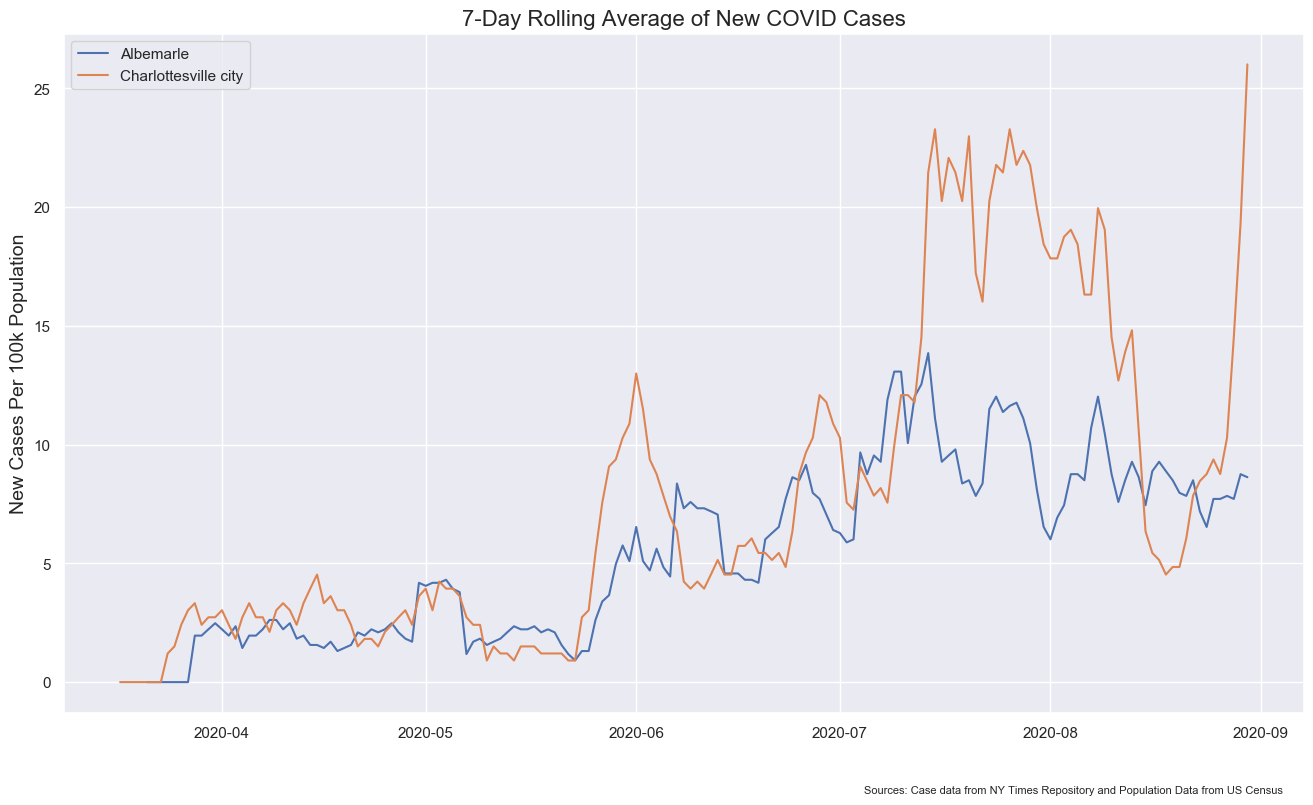

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')